##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Scikit-Learn Model Card Toolkit Demo


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/responsible_ai/model_card_toolkit/examples/Scikit_Learn_Model_Card_Toolkit_Demo"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/model-card-toolkit/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Background
This notebook demonstrates how to generate a model card using the Model Card Toolkit with a scikit-learn model in a Jupyter/Colab environment. You can learn more about model cards at [https://modelcards.withgoogle.com/about](https://modelcards.withgoogle.com/about).

## Setup
We first need to install and import the necessary packages.

### Upgrade to Pip and Install Packages

In [ ]:
!pip install --upgrade pip==21.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install -q model-card-toolkit

     |████████████████████████████████| 79 kB 3.3 MB/s             
     |████████████████████████████████| 48 kB 4.1 MB/s             
     |████████████████████████████████| 1.8 MB 40.8 MB/s            
     |████████████████████████████████| 56 kB 3.5 MB/s             
     |████████████████████████████████| 2.4 MB 37.4 MB/s            
     |████████████████████████████████| 133 kB 64.2 MB/s            
     |████████████████████████████████| 6.6 MB 40.8 MB/s            
     |████████████████████████████████| 49 kB 5.7 MB/s             
     |████████████████████████████████| 129 kB 52.5 MB/s            
     |████████████████████████████████| 23.6 MB 3.3 MB/s             
     |████████████████████████████████| 19.1 MB 1.3 MB/s            
     |████████████████████████████████| 793 kB 54.1 MB/s            
     |████████████████████████████████| 14.8 MB 31.1 MB/s            
     |████████████████████████████████| 10.3 MB 35.4 MB/s            
     |█████████████████████████████

### Reinicia el entorno de ejecución

Es necesario reiniciar el entorno de ejecución (*runtime*) para que la libreria funcione correctamente.

### Import packages

We import necessary packages, including scikit-learn.

In [ ]:
import model_card_toolkit as mctlib

In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid
import os

## Load data

This example uses the Breast Cancer Wisconsin Diagnostic dataset that scikit-learn can load using the [load_breast_cancer()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function.

- Scikit Learn: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset

- UCI Machine Learning Repo: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [ ]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,12.68,20.35,80.79,496.7,0.1120,0.1879,0.20790,0.05556,0.2590,0.09158
442,13.78,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,0.1405,0.05848,...,15.27,17.50,97.90,706.6,0.1072,0.1071,0.03517,0.03312,0.1859,0.06810
180,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,0.05770,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.53400,0.26880,0.2856,0.08082
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.131000,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.014730,0.1650,0.05701,...,14.73,21.70,93.76,663.5,0.1213,0.1676,0.13640,0.06987,0.2741,0.07582


In [ ]:
y_train.head()

398    1
442    1
180    0
250    0
364    1
dtype: int64

## Plot data

We will create several plots from the data that we will include in the model card.

In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.
# Función para exportar una imagen (png,jpg,etc.) a un string codificado en base64, la libreria solo acepta este tipo de formato para imagenes

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

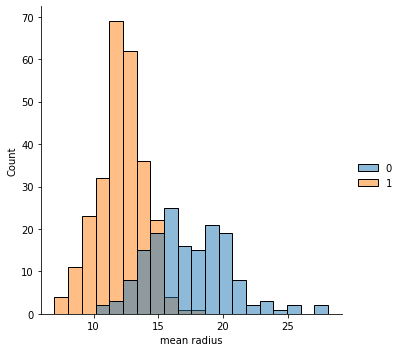

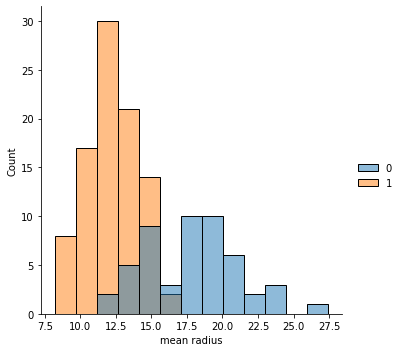

In [ ]:
# Plot the mean radius feature for both the train and test sets
# Media del radio (media de las distancias del centro a los puntos del perímetro)
# |__ Hace parte de las diez características calculadas (de valor real) para cada núcleo celular

sns.displot(x=X_train['mean radius'], hue=y_train, )
mean_radius_train = plot_to_str() # Se guarda la imagen con diferente formato

sns.displot(x=X_test['mean radius'], hue=y_test)
mean_radius_test = plot_to_str()

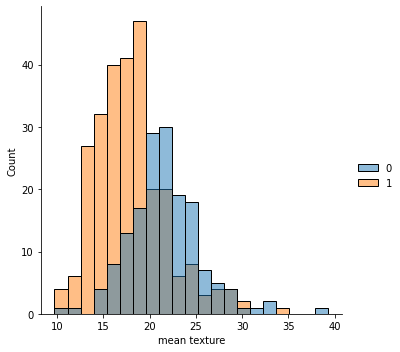

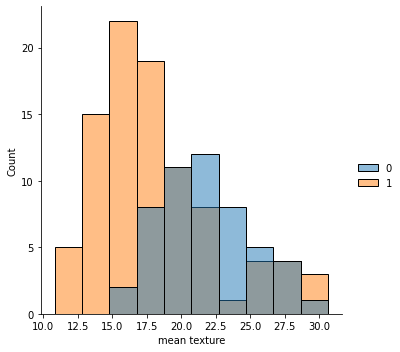

In [ ]:
# Plot the mean texture feature for both the train and test sets
# Media de la Textura --> Hace parte de las diez características calculadas (de valor real) para cada núcleo celular
# Documentación: textura (desviación estándar de los valores de la escala de grises)

sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_train = plot_to_str() # Se guarda la imagen con diferente formato

sns.displot(x=X_test['mean texture'], hue=y_test)
mean_texture_test = plot_to_str()

## Train model

In [ ]:
# Create a classifier and fit the training data

clf = GradientBoostingClassifier().fit(X_train, y_train)

## Evaluate model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


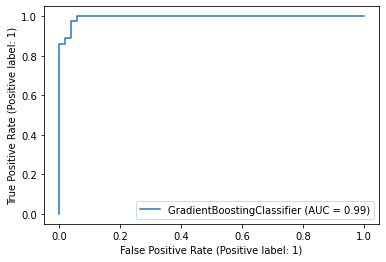

In [ ]:
# Plot a ROC curve

plot_roc_curve(clf, X_test, y_test)
roc_curve = plot_to_str() # Se guarda la imagen con diferente formato

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


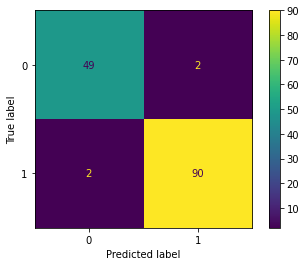

In [ ]:
# Plot a confusion matrix

plot_confusion_matrix(clf, X_test, y_test)
confusion_matrix = plot_to_str() # Se guarda la imagen con diferente formato

## Create a model card

### Initialize toolkit and model card

In [ ]:
# Inicializar el objeto 'ModelCardToolkit' el cual mantiene activos un archivo JSON de la Model Card y una plantilla de la Model Card
mct = mctlib.ModelCardToolkit()

# Al llamar a 'ModelCardToolkit.scaffold_assets()' se generan los archivos/recursos anteriores y devuelve un objeto 'ModelCard'.
model_card = mct.scaffold_assets()

In [ ]:
type(model_card)

model_card_toolkit.model_card.ModelCard

### Annotate information into model card

In [ ]:
# Nombre del conjunto de datos
model_card.model_details.name = 'Conjunto de datos para Diagnóstico de Cáncer de Mama'

# Descripción del modelo
model_card.model_details.overview = ('Este modelo de ML predice si el cáncer de mama es benigno o'
                                     ' maligno basándose en mediciones de imágenes')

# Propietario del Model Card
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards IA Ético', contact='xxx.xxx@autonoma.edu.co')
]

# Referencias del modelo y/o conjunto de datos
model_card.model_details.references = [mctlib.Reference(reference='https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)'),
                                      mctlib.Reference(reference='https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf')
                                      ]

# Versión y fecha del Model Card
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

# Consideraciones éticas
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('La selección manual de secciones de imagen para digitalizar podría crear un sesgo de selección'),
    mitigation_strategy='Automatizar el proceso de selección'
    )]

# Limitaciones, uso previsto y usuarios
model_card.considerations.limitations = [mctlib.Limitation(description='Diagnostico de Cancer de Mama')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Diagnostico de Cancer de Mama')]
model_card.considerations.users = [mctlib.User(description='Médicos Profesionales'), mctlib.User(description='Investigadores de ML')]

# Graficas del modelo
model_card.model_parameters.data.append(mctlib.Dataset())
    # Descripción datos de entrenamiento (no aparece en el Model Card)
model_card.model_parameters.data[0].graphics.description = (f'{len(X_train)} filas con {len(X_train.columns)} caracteristicas')
    # Graficas de datos de entrenamiento
model_card.model_parameters.data[0].graphics.collection = [mctlib.Graphic(image=mean_radius_train), 
                                                           mctlib.Graphic(image=mean_texture_train)
                                                           ]

model_card.model_parameters.data.append(mctlib.Dataset())
    # Descripción de datos de test (no aparece en el Model Card)
model_card.model_parameters.data[1].graphics.description = (f'{len(X_test)} filas con {len(X_test.columns)} caracteristicas')
    # Graficas de datos de test
model_card.model_parameters.data[1].graphics.collection = [mctlib.Graphic(image=mean_radius_test),
                                                           mctlib.Graphic(image=mean_texture_test)
                                                           ]

# Descripción e ingreso de graficas (Analisis Cuantitativo)
model_card.quantitative_analysis.graphics.description = ('Curva ROC y Matriz de Confusión')
model_card.quantitative_analysis.graphics.collection = [mctlib.Graphic(image=roc_curve),
                                                        mctlib.Graphic(image=confusion_matrix)
                                                        ]

# Actualizar model_card con los datos ingresados
mct.update_model_card(model_card)

## Generate model card

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))